In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("code")
import numpy as np
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
from npm3dGenerator_tree import NPM3DGenerator, NPM3DGenerator_full
from models import build_point_net, save_model, load_model
import utils_training as u_t

Using TensorFlow backend.


In [2]:
dataset = NPM3DGenerator(paths_to_keep = [0], sample_uniformly_from_classes = True)
print(dataset)

MODIFIYING PATHS ../Benchmark_MVA/training\MiniLille1.ply
LOADING NORMALS ../Benchmark_MVA/training\MiniLille1_normals.npy

NPM3DGenerator config
n_classes         : 6
batch_size        : 8
n_points          : 4096
n_channels        : 8
train             : True
use_normals       : True
normal_radius     : 0.75
compute_normals   : True
class_weight      : [2.48 2.20 343.79 10000.00 16.65 18.26]


134543
0.09275078773498535


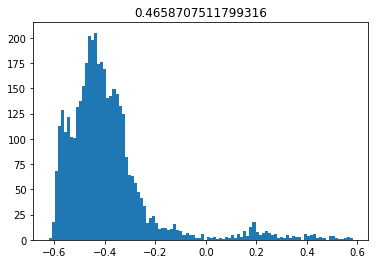

In [5]:
from sklearn.neighbors import KDTree
import time

pc = dataset.sample_point_cloud()
t = time.time()
d, i = KDTree(pc[0][:, :3]).query(pc[0][:, :3], k = 100)
print(time.time() - t)
plt.hist(np.log10(d[:, -1]), bins = 100)
plt.title(np.mean(d[:, -1]))
plt.show()